# Importing Required Libraries

# **Dataset description**


An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. *Your task is to predicted individual income using neural networks*.

**Attribute Information:**

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

class: >50K, <=50K

*Missing Attribute Values:*

7% have missing values.

*Class Distribution:*

Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

In [14]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load the dataset
file_path = 'IMDB Dataset.csv'
df = pd.read_csv(file_path)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


# Data Preprocesssing

In [16]:
# Check for missing values
df.isnull().sum()

# Encoding categorical features
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Separating the features (X) and the target variable (y)
y = df['sentiment']
X = df.drop('sentiment', axis=1)  # Replace 'target_column_name' with the actual target column name


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Building Neural Networks

In [17]:
# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'softmax' for multi-class classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class

# Summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


# Train the NN network

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")


Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6934 - accuracy: 0.5062 - val_loss: 0.6928 - val_accuracy: 0.5044
Epoch 2/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6930 - accuracy: 0.5079 - val_loss: 0.6926 - val_accuracy: 0.5136
Epoch 3/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6929 - accuracy: 0.5128 - val_loss: 0.6923 - val_accuracy: 0.5142
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6927 - accuracy: 0.5128 - val_loss: 0.6923 - val_accuracy: 0.5200
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6927 - accuracy: 0.5137 - val_loss: 0.6926 - val_accuracy: 0.5232
Epoch 6/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6928 - accuracy: 0.5112 - val_loss: 0.6925 - val_accuracy: 0.5189
Epoch 7/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6926 - accuracy: 0.5124 - val_loss: 0.6926 - val_accuracy:

# Making predictions

In [33]:
# Making predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


313/313 [==============================] - 0s 712us/step
[[1849 3112]
 [1695 3344]]
              precision    recall  f1-score   support

           0       0.52      0.37      0.43      4961
           1       0.52      0.66      0.58      5039

    accuracy                           0.52     10000
   macro avg       0.52      0.52      0.51     10000
weighted avg       0.52      0.52      0.51     10000



In [20]:
# Save the trained model
model.save('imdb_model.h5')

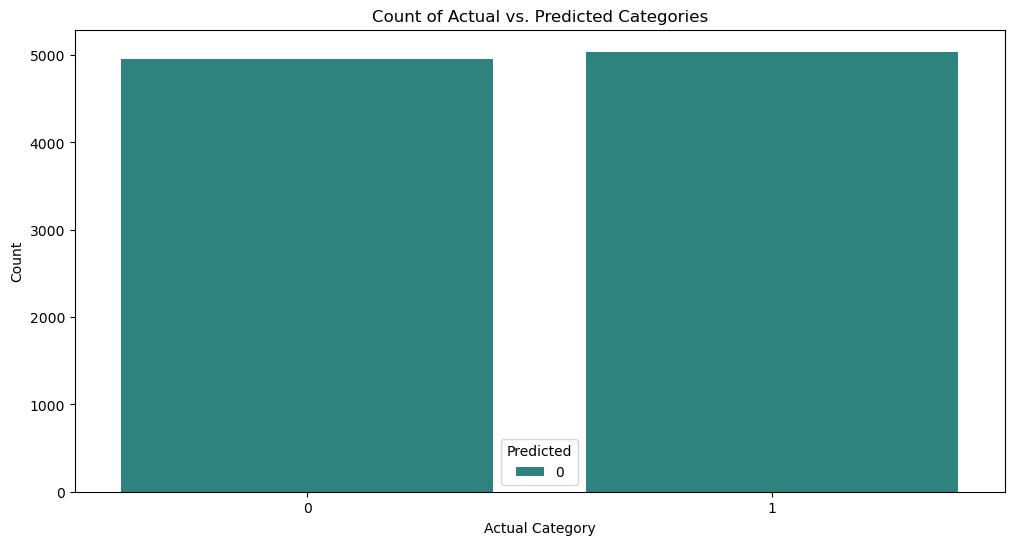

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Predict class probabilities and then convert to class labels
y_pred = np.argmax(y_pred_prob, axis=1) 
# Combine actual and predicted labels into a DataFrame
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the index of the highest probability

plt.figure(figsize=(12, 6))
sns.countplot(x='Actual', hue='Predicted', data=results_df, palette='viridis')

plt.xlabel('Actual Category')
plt.ylabel('Count')
plt.title('Count of Actual vs. Predicted Categories')

# Show plot
plt.show()
